In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import path

In [4]:
st.set_page_config(layout="wide", 
                   initial_sidebar_state="expanded",
                   page_icon="⚡", 
                   page_title='Deja Vu Stores Dashboard')
# set_page_config => https://github.com/streamlit/streamlit/issues/1770



In [30]:

df = pd.read_csv('dataonline.csv', parse_dates=["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
df.shape


(541909, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df["Revenue"] = df["Quantity"]*df["UnitPrice"]
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceYear"]=df["InvoiceDate"].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   Revenue       541909 non-null  float64       
 9   InvoiceMonth  541909 non-null  int64         
 10  InvoiceYear   541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 45.5+ MB


In [17]:
df["InvoiceYear"].unique()

array([2010, 2011], dtype=int64)

In [18]:
#Monthly Revenue Overview
df_revenue = df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
df_revenue

,InvoiceMonth,InvoiceYear,Revenue
0,1,2011,560000.260
1,2,2011,498062.650
2,3,2011,683267.080
3,4,2011,493207.121
4,5,2011,723333.510
5,6,2011,691123.120
6,7,2011,681300.111
7,8,2011,682680.510
8,9,2011,1019687.622
9,10,2011,1070704.670


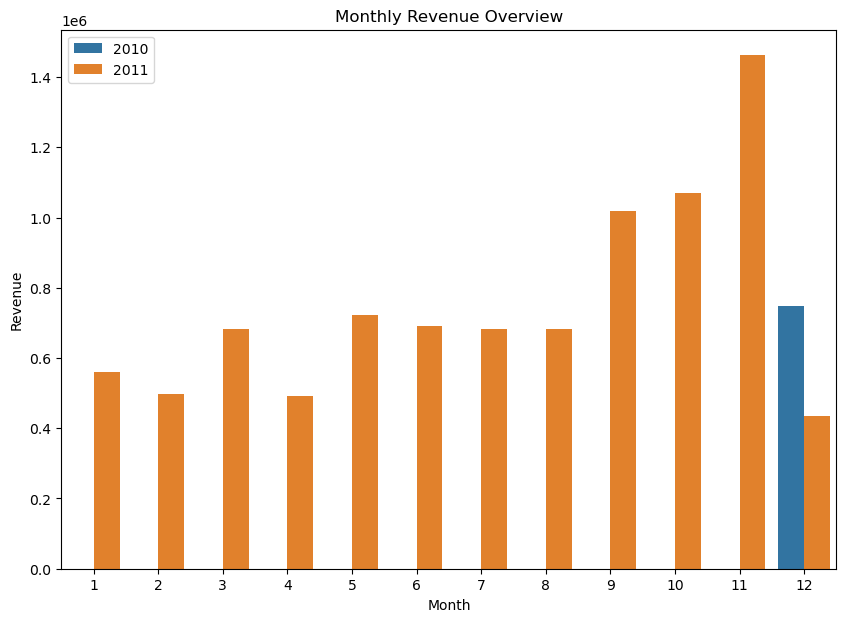

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(loc="upper left")
plt.show()

In [20]:
# Look at the December 2011 data
df_december_2011 = df.query("InvoiceMonth==12 and InvoiceYear==2011").copy()
df_december_2011['InvoiceDay'] = df_december_2011['InvoiceDate'].dt.day

In [21]:
df_december_2011['InvoiceDay'].unique()

array([1, 2, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
df_december_2010 = df.query("InvoiceYear==2010").copy()
df_december_2010['InvoiceDay'] = df_december_2010['InvoiceDate'].dt.day

In [23]:
df_december_2010['InvoiceDay'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23], dtype=int64)

In [24]:
# Monthly Items Sold Overview
df_quantity=df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
df_quantity

,InvoiceMonth,InvoiceYear,Quantity
0,1,2011,308966
1,2,2011,277989
2,3,2011,351872
3,4,2011,289098
4,5,2011,380391
5,6,2011,341623
6,7,2011,391116
7,8,2011,406199
8,9,2011,549817
9,10,2011,570532


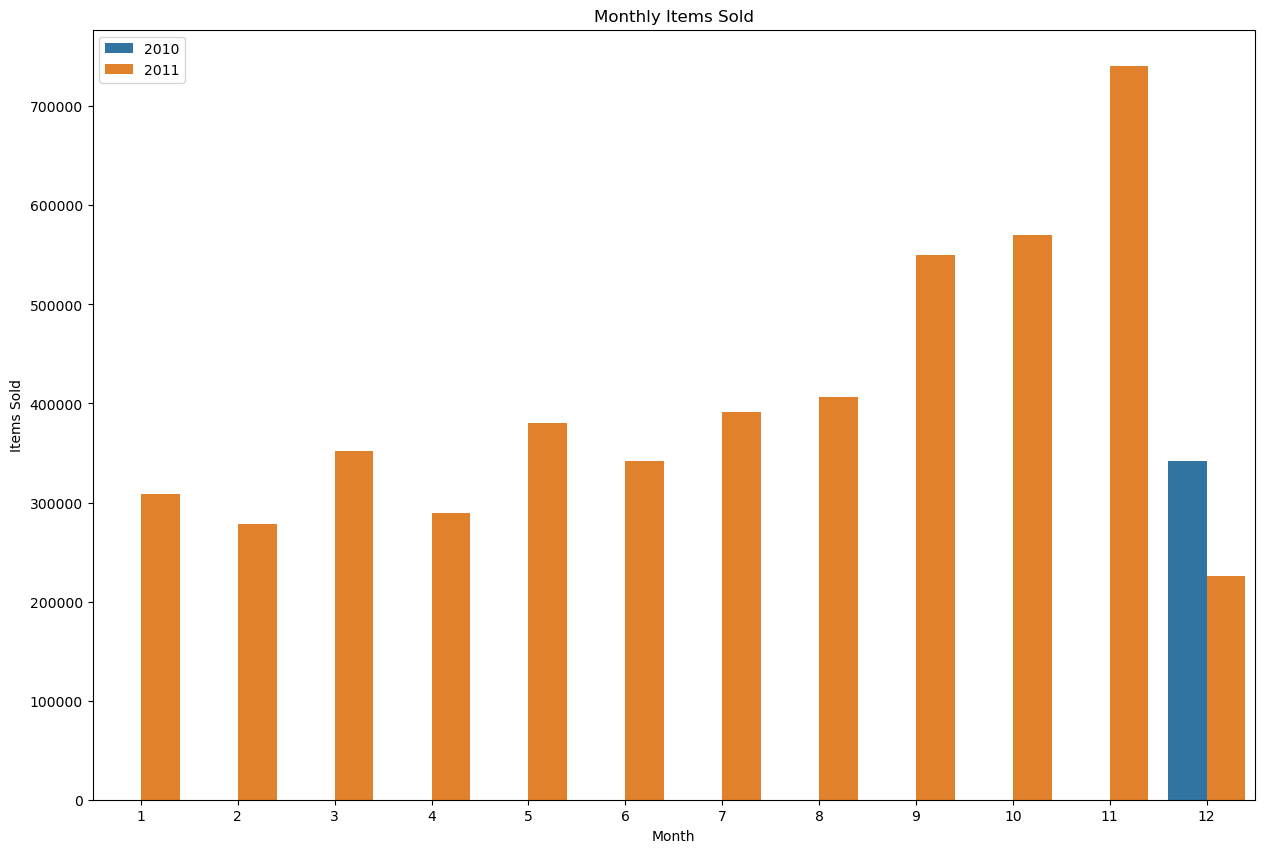

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", hue="InvoiceYear", data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")
plt.legend(loc="upper left")
plt.show()

In [26]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
df_active

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


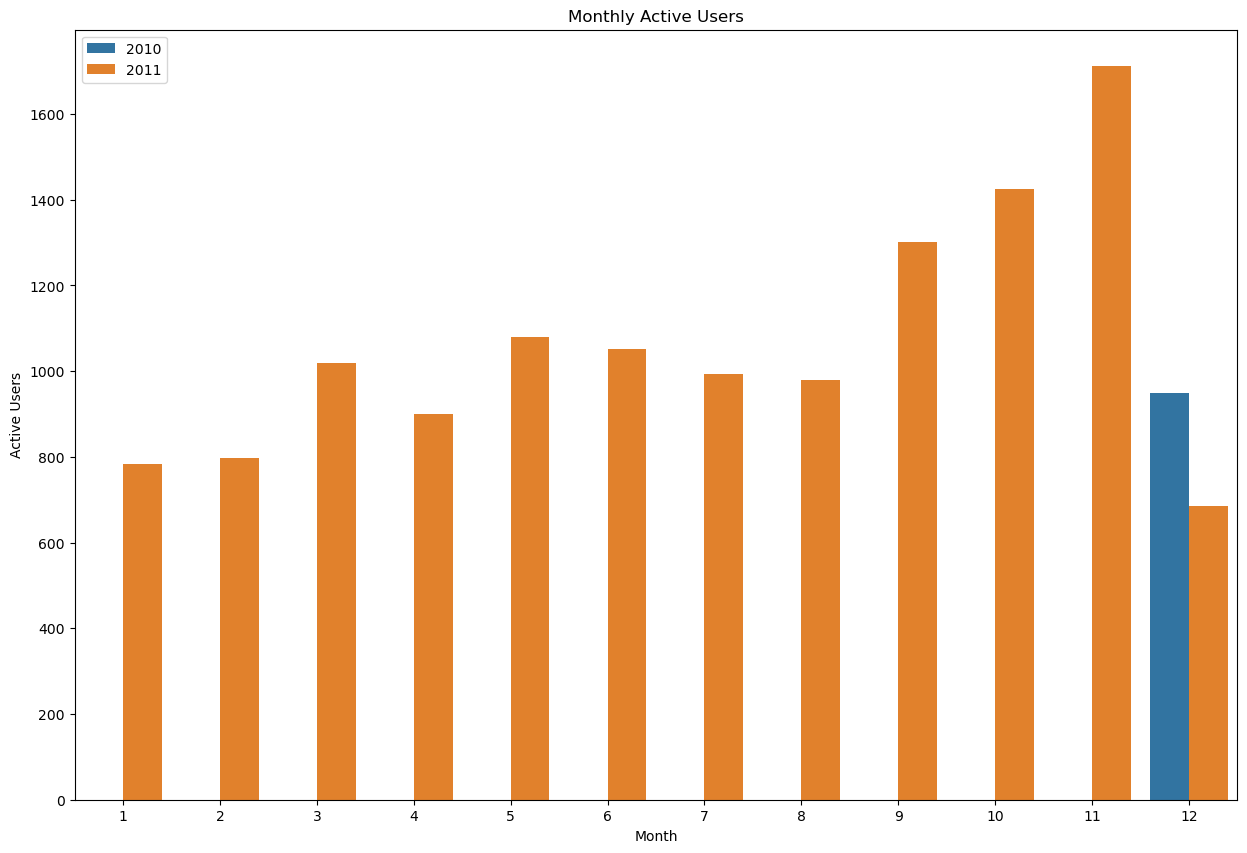

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")
plt.legend(loc="upper left")
plt.show()

In [28]:
df_active_2011 = df_active[df_active['InvoiceYear'] != 2010]
df_active_2011

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


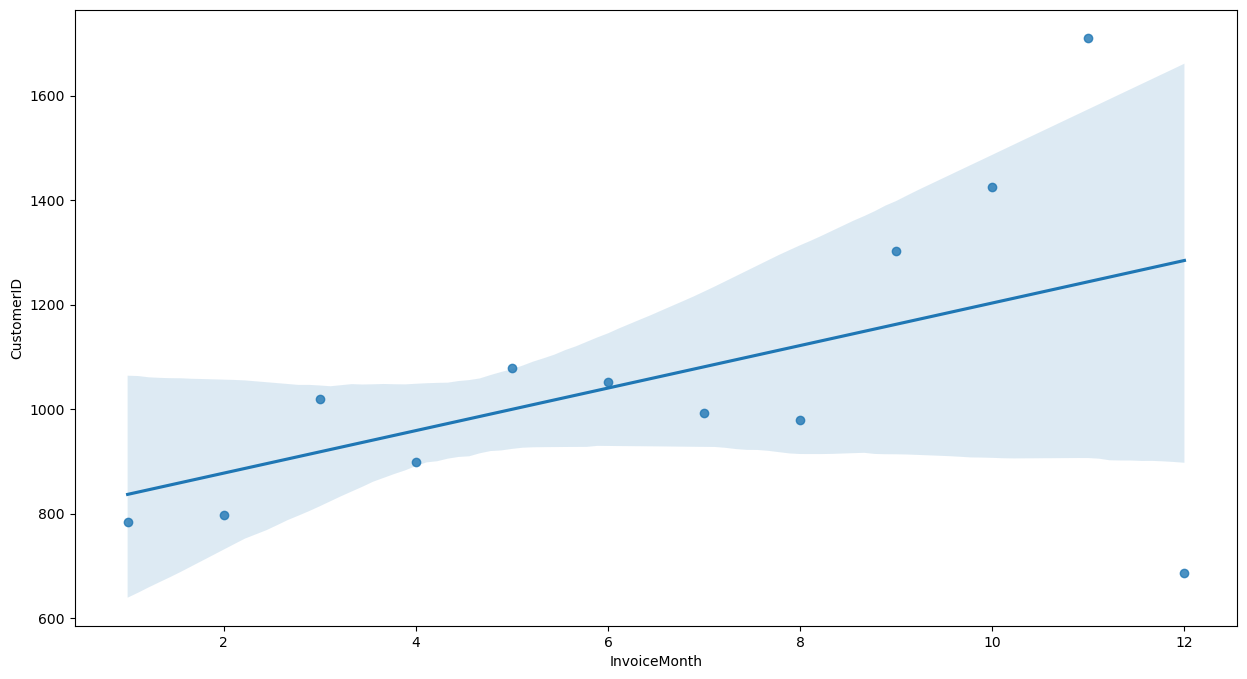

In [29]:
plt.figure(figsize=(15,8))
sns.regplot(x="InvoiceMonth", y="CustomerID", data=df_active_2011)
plt.show()